In [1]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

In [2]:
from apps.optics.noise_searcher2 import NoiseSearcher2
from src.general_methods.visualizer import Visualizer
from src.optics.config_manager import ChannelConfig
import os
import yaml

In [3]:
dir_path = """
/data/yarcoh/thesis_data/data/outputs/ber_maps/2023.09.13-22.24.36_long_fixed_channel
""".strip()

In [4]:
# read config file from dir_path and insert those values into ChannelConfig
config_path = os.path.join(dir_path, 'cs_config.yml')

# read yaml:
with open(config_path, 'r') as stream:
    conf = yaml.safe_load(stream)

Visualizer.print_config(conf)

{
    "K_T": 1.13,
    "L": 960,
    "La": 80,
    "M_QAM": 16,
    "N_sc": 256,
    "N_sc_raw": 237.50440461138834,
    "Nos": 16,
    "Nspans": 12,
    "Pn": 8.964743939765935e-06,
    "T0": 5120.0,
    "T_guardband": 4750.0880922277665,
    "Tb": 10240.0,
    "Tn": 1358.1221810508403,
    "Ts": 1.0,
    "W": 0.05,
    "Zn": 87833.13612677579,
    "bet": 0.2,
    "beta2": -21.0,
    "chi": 0.0461,
    "dz": 0.2,
    "eta": 2,
    "gamma": 1.27,
    "mu": 0.1,
    "verbose": false,
    "with_noise": true,
    "with_ssf": true
}


In [5]:
channel_config = ChannelConfig(**conf)
ns = NoiseSearcher2.load_from_config(channel_config)

BERs, mus = ns.load_ber_map(dir_path)


In [6]:
ns.print_ber_vec(BERs, mus)

         mu          BER
-----------  -----------
  0.01       0.321338
  0.0120679  0.281621
  0.0145635  0.23915
  0.0175751  0.204287
  0.0212095  0.174648
  0.0255955  0.141631
  0.0308884  0.0946289
  0.0372759  0.0624219
  0.0449843  0.0361719
  0.0542868  0.0186523
  0.0655129  0.00875
  0.0790604  0.00175781
  0.0954095  0
  0.11514    0
  0.13895    0
  0.167683   0
  0.202359   0
  0.244205   0
  0.294705   0
  0.355648   0.000488281
  0.429193   0.0123047
  0.517947   0.0650195
  0.625055   0.171104
  0.754312   0.273721
  0.910298   0.340938
  1.09854    0.372725
  1.32571    0.432363
  1.59986    0.486426
  1.9307     0.581611
  2.32995    0.645732
  2.81177    0.709727
  3.39322    0.667969
  4.09492    0.647178
  4.94171    0.677861
  5.96362    0.721289
  7.19686    0.710547
  8.68511    0.690293
 10.4811     0.728652
 12.6486     0.684561
 15.2642     0.759561
 18.4207     0.67541
 22.23       0.765205
 26.827      0.740576
 32.3746     0.709902
 39.0694     0.700225
 

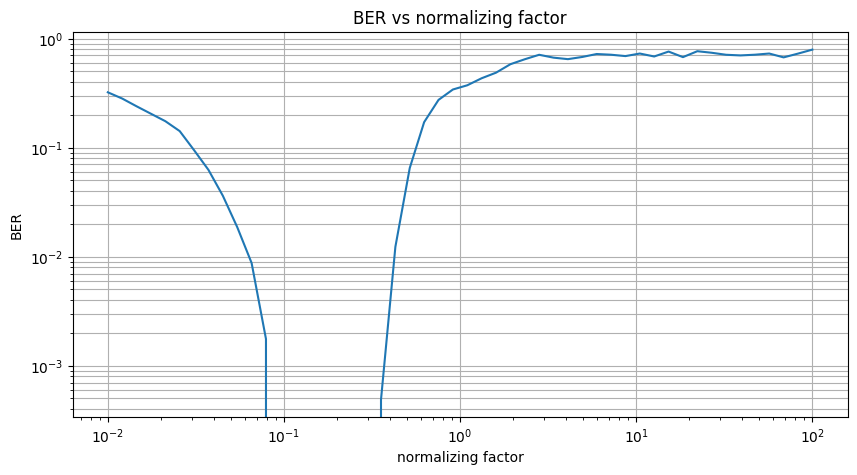

In [7]:
ns.plot_ber_map(BERs, mus,log_mu=True)